# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#etc

#your info here
__author__ = "Shreesha"
__email__ = "shreesha.1990@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('data/train_features.csv')
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
train_salaries = pd.read_csv(('data/train_salaries.csv'))
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [4]:
test_features = pd.read_csv('data/test_features.csv')
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### ---- 3 Clean the data ----

In [5]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
#checking for missing values
print('\nMissing values\n')
print(train_features.isnull().sum())
print('\nSummary of Features\n')
print(train_features.describe(include='all'))
print('\nSummary of Target\n')
print(train_salaries.describe(include='all'))
print('\nMissing values in Target\n')
print(train_salaries.isnull().sum())


Missing values

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

Summary of Features

                   jobId companyId  jobType       degree    major industry  \
count            1000000   1000000  1000000      1000000  1000000  1000000   
unique           1000000        63        8            5        9        7   
top     JOB1362684919380    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB   
freq                   1     16193   125886       236976   532355   143206   
mean                 NaN       NaN      NaN          NaN      NaN      NaN   
std                  NaN       NaN      NaN          NaN      NaN      NaN   
min                  NaN       NaN      NaN          NaN      NaN      NaN   
25%                  NaN       NaN      NaN          NaN      NaN      NaN   
50%                  NaN       NaN      NaN   

#### Since Job Id and CampanyIds are identifying informations, we are removing them 

In [6]:
train_features.drop(columns = ['jobId', 'companyId'], inplace = True)
test_features.drop(columns = ['jobId', 'companyId'], inplace = True)

### ---- 4 Explore the data (EDA) ----

In [7]:
#summarize each feature variable
for feature in train_features.columns:
    print('\nSummary for feature ' + feature +'\n')
    print(train_features[feature].describe())


Summary for feature jobType

count     1000000
unique          8
top        SENIOR
freq       125886
Name: jobType, dtype: object

Summary for feature degree

count         1000000
unique              5
top       HIGH_SCHOOL
freq           236976
Name: degree, dtype: object

Summary for feature major

count     1000000
unique          9
top          NONE
freq       532355
Name: major, dtype: object

Summary for feature industry

count     1000000
unique          7
top           WEB
freq       143206
Name: industry, dtype: object

Summary for feature yearsExperience

count    1000000.000000
mean          11.992386
std            7.212391
min            0.000000
25%            6.000000
50%           12.000000
75%           18.000000
max           24.000000
Name: yearsExperience, dtype: float64

Summary for feature milesFromMetropolis

count    1000000.000000
mean          49.529260
std           28.877733
min            0.000000
25%           25.000000
50%           50.000000
75%       

In [8]:
#summarize the target variable
print('\nSummary for Target Salarires\n')
train_salaries.drop(columns = ['jobId'])
print(train_salaries.describe())


Summary for Target Salarires

               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000


### Label Encoding Data

In [9]:
cat_columns = ['jobType', 'major', 'degree', 'industry']
num_columns = ['yearsExperience', 'milesFromMetropolis']

def labelEncode(columns, df):
    df_label = pd.DataFrame()
    df_final = pd.DataFrame()
    for column in columns:
        df[column] = df[column].astype('category')
        df_final[column] = df[column].cat.codes
    return df_final

df_final_label = labelEncode(cat_columns, train_features)
df_final_label = pd.concat([df_final_label, train_features[num_columns]], axis = 1)
df_final_label['salary'] = train_salaries['salary']
df_final_label.head()

,jobType,major,degree,industry,yearsExperience,milesFromMetropolis,salary
0,1,6,3,3,10,83,130
1,0,7,2,6,3,73,101
2,7,8,1,3,10,38,137
3,5,2,1,0,8,17,142
4,7,8,0,2,8,16,163


In [10]:
def correlationPlot(corr_df):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = corr_df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center = 0.5,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

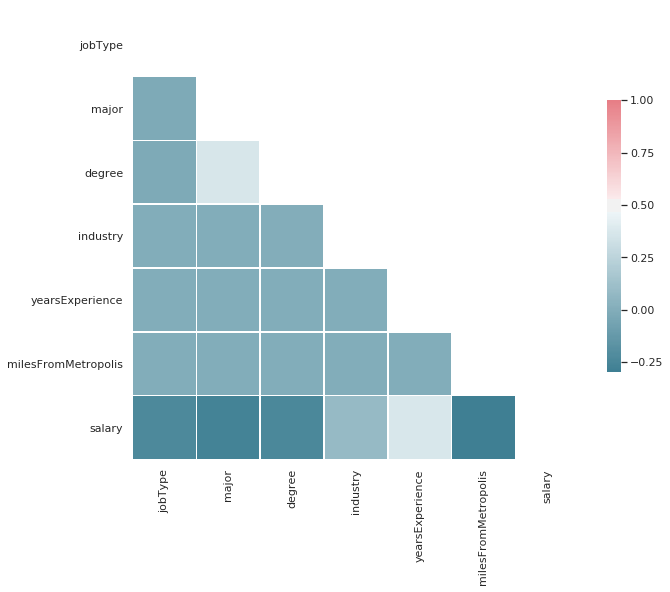

In [11]:
correlationPlot(df_final_label)

### Correlation Matrix

In [12]:
df_final_label.corr()

,jobType,major,degree,industry,yearsExperience,milesFromMetropolis,salary
jobType,1.000000,-0.020774,-0.020084,0.000069,-0.000186,-0.000365,-0.228673
major,-0.020774,1.000000,0.370089,0.001075,0.000012,-0.001369,-0.262430
degree,-0.020084,0.370089,1.000000,0.001551,-0.000144,-0.001359,-0.231789
industry,0.000069,0.001075,0.001551,1.000000,0.000263,-0.000819,0.086502
yearsExperience,-0.000186,0.000012,-0.000144,0.000263,1.000000,0.000673,0.375013
milesFromMetropolis,-0.000365,-0.001369,-0.001359,-0.000819,0.000673,1.000000,-0.297666
salary,-0.228673,-0.262430,-0.231789,0.086502,0.375013,-0.297666,1.000000


### One Hot encoding Data

In [13]:
def oneHotEncode(column, df):
    df_dummies = pd.get_dummies(df[column])
    del df_dummies[df_dummies.columns[-1]]
    return df_dummies

In [14]:
#Encoding Catagorical Variables for jobType
df_jobType = oneHotEncode('jobType', train_features)
df_jobType.head()

,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0


In [15]:
#Encoding Catagorical Variables for degree
df_degree = oneHotEncode('degree', train_features)
df_degree.head()

,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [16]:
#Encoding Catagorical Variables for major
df_major = oneHotEncode('major', train_features)
df_major.head()

,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [17]:
#Encoding Catagorical Variables for industry
df_industry = oneHotEncode('industry', train_features)
df_industry.head()

,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,0,0,0,1,0,0
1,0,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [18]:
df_final_onehot = pd.DataFrame()
df_removed_cat = train_features.drop(columns = cat_columns)
df_final_onehot = pd.concat([df_removed_cat, df_jobType, df_major, df_degree, df_industry, train_salaries[['salary']]], axis = 1)
df_final_onehot.head()

,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BIOLOGY,...,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,salary
0,10,83,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,130
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,101
2,10,38,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,137
3,8,17,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,142
4,8,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,163


### Correlation Plot

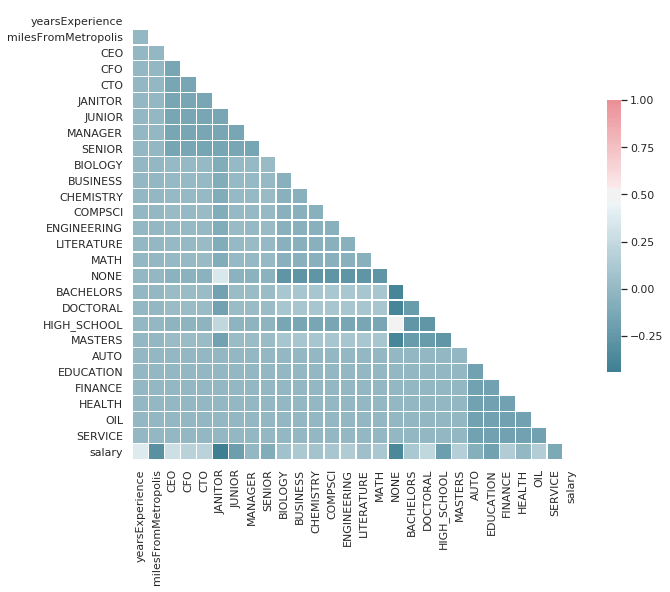

In [45]:
#look for correlation between each feature and the target
#look for correlation between features
correlationPlot(df_final_onehot)

### Correlation Matrix

In [46]:
df_final_onehot.corr()

,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BIOLOGY,...,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,salary
yearsExperience,1.000000,0.000673,0.000308,-0.000102,0.000966,-0.001191,-0.000005,-0.000265,0.000223,-0.000041,...,0.000698,0.000240,-0.000476,-0.001003,0.000437,0.000981,-0.001105,0.000798,0.000129,0.375013
milesFromMetropolis,0.000673,1.000000,-0.000664,0.000567,0.000676,-0.001118,0.001708,-0.000409,0.000569,-0.000041,...,0.001266,-0.001349,0.000394,0.000343,0.000808,0.000048,-0.000398,-0.000551,0.000687,-0.297666
CEO,0.000308,-0.000664,1.000000,-0.142300,-0.142742,-0.142693,-0.142447,-0.142791,-0.143290,0.013469,...,0.025968,-0.034502,0.024003,0.000621,0.000150,0.000747,-0.001615,0.000591,-0.000824,0.285245
CFO,-0.000102,0.000567,-0.142300,1.000000,-0.142475,-0.142426,-0.142180,-0.142524,-0.143021,0.014314,...,0.023007,-0.032499,0.025979,-0.001417,-0.000929,0.000777,0.001920,-0.000635,-0.000770,0.188804
CTO,0.000966,0.000676,-0.142742,-0.142475,1.000000,-0.142868,-0.142622,-0.142966,-0.143465,0.011759,...,0.023782,-0.033692,0.026803,-0.000729,0.000450,-0.000794,-0.001581,0.001936,0.000921,0.189600
JANITOR,-0.001191,-0.001118,-0.142693,-0.142426,-0.142868,1.000000,-0.142573,-0.142917,-0.143416,-0.094099,...,-0.174274,0.233343,-0.174242,0.001886,0.000197,-0.000477,-0.001100,-0.001273,0.000236,-0.441660
JUNIOR,-0.000005,0.001708,-0.142447,-0.142180,-0.142622,-0.142573,1.000000,-0.142671,-0.143169,0.012118,...,0.025254,-0.031657,0.023861,0.000027,0.001563,-0.000358,0.001451,-0.002531,-0.000112,-0.201993
MANAGER,-0.000265,-0.000409,-0.142791,-0.142524,-0.142966,-0.142917,-0.142671,1.000000,-0.143515,0.014252,...,0.024053,-0.033803,0.025539,0.001890,-0.000861,0.000720,-0.001112,0.000150,0.000120,-0.006781
SENIOR,0.000223,0.000569,-0.143290,-0.143021,-0.143465,-0.143416,-0.143169,-0.143515,1.000000,0.014849,...,0.026185,-0.035347,0.025028,-0.001520,0.000828,-0.000715,-0.000223,0.001871,0.000498,-0.103642
BIOLOGY,-0.000041,-0.000041,0.013469,0.014314,0.011759,-0.094099,0.012118,0.014252,0.014849,1.000000,...,0.102820,-0.138763,0.102307,-0.000876,0.000529,-0.000993,0.001842,-0.000473,0.001060,0.076341


In [30]:
# Drop target from data
df_final_label.drop(columns = ['salary'], inplace = True, axis = 1)
df_final_onehot.drop(columns = ['salary'], inplace = True, axis = 1)
df_final_label.head()

,jobType,major,degree,industry,yearsExperience,milesFromMetropolis
0,1,6,3,3,10,83
1,0,7,2,6,3,73
2,7,8,1,3,10,38
3,5,2,1,0,8,17
4,7,8,0,2,8,16


### ---- 5 Establish a baseline ----

In [31]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
# Selecting industry for my base line
df_baseline = df_final_onehot.loc[:,:]
print(df_baseline.shape)
df_baseline.head()

(1000000, 27)


,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BIOLOGY,...,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,10,83,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,10,38,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
# data scaling
scaler = MinMaxScaler()
print(type(df_baseline))
columns = df_baseline.columns
print(columns)
scaler.fit(df_baseline)
X = scaler.transform(np.array(df_baseline))
df_baseline = pd.DataFrame(X)
df_baseline.columns = columns
df_baseline.head()

<class 'pandas.core.frame.DataFrame'>
Index(['yearsExperience', 'milesFromMetropolis', 'CEO', 'CFO', 'CTO',
       'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR', 'BIOLOGY', 'BUSINESS',
       'CHEMISTRY', 'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'NONE',
       'BACHELORS', 'DOCTORAL', 'HIGH_SCHOOL', 'MASTERS', 'AUTO', 'EDUCATION',
       'FINANCE', 'HEALTH', 'OIL', 'SERVICE'],
      dtype='object')


/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,yearsExperience,milesFromMetropolis,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,BIOLOGY,...,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE
0,0.416667,0.838384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.125000,0.737374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.416667,0.383838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.333333,0.171717,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.161616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
#Applying linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X = np.array(df_baseline)
y = train_salaries['salary']
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)
mse = []
k =0
for train_index, test_index in kf.split(X):
    k += 1
    print('\nFold', k ,'\n')
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    print('MSE', error)
    mse.append(error)
    
print('Average MSE', np.array(mse).mean())

KFold(n_splits=5, random_state=None, shuffle=False)

Fold 1 

TRAIN: [200000 200001 200002 ... 999997 999998 999999] TEST: [     0      1      2 ... 199997 199998 199999]
MSE 386.37885145434694

Fold 2 

TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [200000 200001 200002 ... 399997 399998 399999]
MSE 385.1912617183353

Fold 3 

TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [400000 400001 400002 ... 599997 599998 599999]
MSE 386.03614357256157

Fold 4 

TRAIN: [     0      1      2 ... 999997 999998 999999] TEST: [600000 600001 600002 ... 799997 799998 799999]
MSE 382.62858448269117

Fold 5 

TRAIN: [     0      1      2 ... 799997 799998 799999] TEST: [800000 800001 800002 ... 999997 999998 999999]
MSE 382.24380524216133
Average MSE 384.49572929401927


In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
cross_val_score(clf, iris.data, iris.target, cv=cv)

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Model 1: Multiple Linear Regression with one hot encoded data

Model 2: Apply Dimentionality Reduction using PCA and apply Multiple linear Regression on top p features(p components)

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model


### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data